# Multiple linear regression Algorithm  -  insurance_charge_prediction
## MODEL CREATION PHASE

## read the dataset

In [2]:
import pandas as pd 
dataset = pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


## convert categorical data into numerical data

In [3]:
dataset = pd.get_dummies(dataset,drop_first=True,dtype=int)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


## split Input and Output

In [4]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [5]:
independent = dataset[['age', 'bmi', 'children',  'sex_male', 'smoker_yes' ]]
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [6]:
dependent = dataset[['charges']]
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


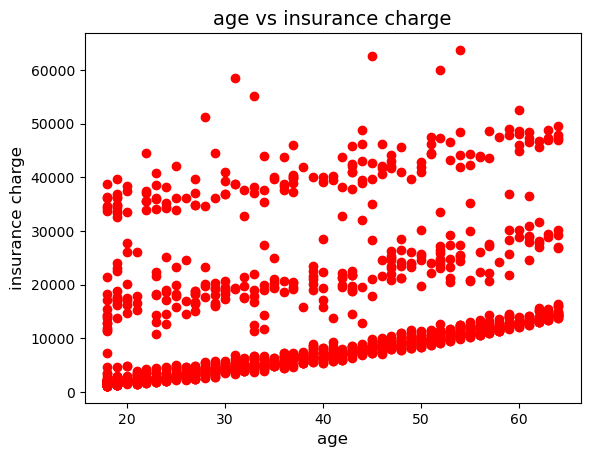

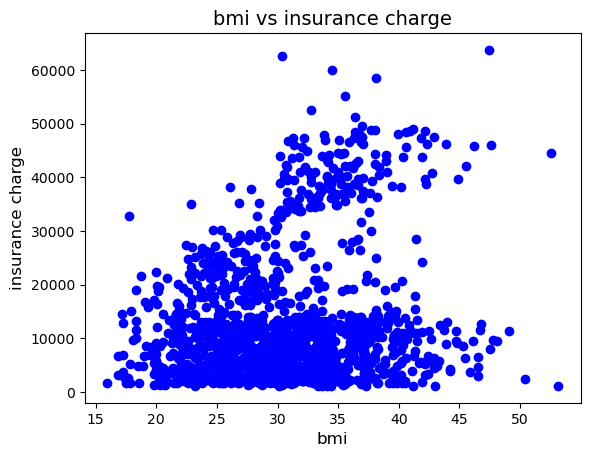

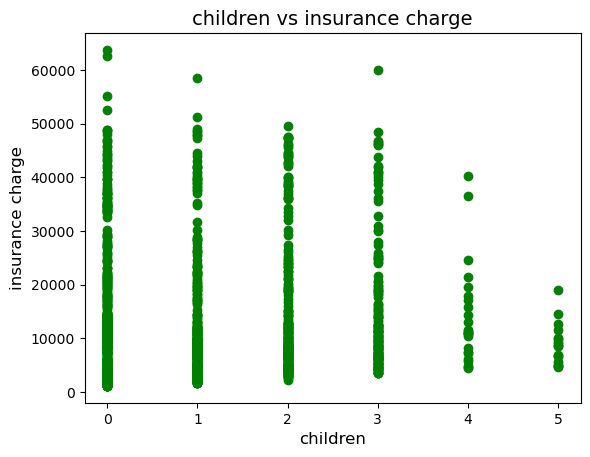

In [24]:
# plot 
import matplotlib.pyplot as plt

plt.scatter(independent['age'], dependent, color='red')
plt.xlabel("age", fontsize=12)
plt.ylabel("insurance charge", fontsize=12)
plt.title("age vs insurance charge", fontsize=14)
plt.show()

plt.scatter(independent['bmi'], dependent, color='blue')
plt.xlabel("bmi", fontsize=12)
plt.ylabel("insurance charge", fontsize=12)
plt.title("bmi vs insurance charge", fontsize=14)
plt.show()

plt.scatter(independent['children'], dependent, color='green')
plt.xlabel("children", fontsize=12)
plt.ylabel("insurance charge", fontsize=12)
plt.title("children vs insurance charge", fontsize=14)
plt.show()

## split train and test set 


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.20, random_state=0)

In [8]:
x_test

,age,bmi,children,sex_male,smoker_yes
578,52,30.200,1,1,0
610,47,29.370,1,0,0
569,48,40.565,2,1,1
1034,61,38.380,0,1,0
198,51,18.050,0,0,0
...,...,...,...,...,...
1084,62,30.495,2,0,0
726,41,28.405,1,1,0
1132,57,40.280,0,1,0
725,30,39.050,3,0,1


In [9]:
y_test

,charges
578,9724.53000
610,8547.69130
569,45702.02235
1034,12950.07120
198,9644.25250
...,...
1084,15019.76005
726,6664.68595
1132,20709.02034
725,40932.42950


## model creation 

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

### view weight and bais

In [12]:
# weight
regressor.coef_

array([[ 2.54952280e+02,  3.20693337e+02,  4.30809389e+02,
        -2.34557931e+01,  2.35890247e+04]])

In [13]:
# weight
regressor.intercept_

array([-11901.10455877])

## test the model 

In [14]:
y_predict = regressor.predict(x_test)
y_predict

array([[ 1.14487064e+04],
       [ 9.93122532e+03],
       [ 3.77727178e+04],
       [ 1.59357390e+04],
       [ 6.88997647e+03],
       [ 3.59863726e+03],
       [ 1.12708165e+03],
       [ 1.40623170e+04],
       [ 8.76765597e+03],
       [ 7.23372702e+03],
       [ 4.15287454e+03],
       [ 1.01167075e+04],
       [ 9.08138366e+03],
       [ 4.30837572e+03],
       [ 2.76879360e+04],
       [ 1.11696620e+04],
       [ 1.11718384e+04],
       [ 5.55433485e+03],
       [ 8.00873212e+03],
       [ 2.66039850e+04],
       [ 3.34802407e+04],
       [ 1.40836906e+04],
       [ 1.12578208e+04],
       [ 3.25955729e+04],
       [ 4.51420381e+03],
       [ 8.63780775e+03],
       [ 7.82347089e+02],
       [ 1.01722949e+04],
       [ 4.25706263e+03],
       [ 1.01894544e+04],
       [ 8.79010666e+03],
       [ 4.03307822e+04],
       [ 1.58764118e+04],
       [ 1.40596765e+04],
       [ 2.43874022e+04],
       [ 4.70442876e+03],
       [ 1.29057280e+04],
       [ 3.09071751e+04],
       [ 3.3

## Evaluation metrics 

In [17]:
from sklearn.metrics import r2_score
r_score = r2_score(y_test, y_predict)
print(f" THE ACCURACY OF THE MODEL : {r_score}")   # THE ACCURACY OF THE MODEL : 0.7978644236809905

 THE ACCURACY OF THE MODEL : 0.7978644236809905


## save the model 

In [ ]:
# import pickle 
# pickle.dump(regressor, open(" ","wb"))

In [25]:
regressor.predict([[ 52, 30.200, 1, 1, 0 ]])

E:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[11448.70639448]])